<a href="https://colab.research.google.com/github/PANKAJ955956/machine-learning-project/blob/main/IPL_win_pridiction01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

# Correct file names
match = pd.read_csv('matches (1).csv')   # space before (1)
delivery = pd.read_csv('deliveries.csv')


In [6]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
match.shape

(1095, 20)

In [10]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [11]:
delivery['match_id']

,match_id
0,335982
1,335982
2,335982
3,335982
4,335982
...,...
233217,1359504
233218,1359504
233219,1359504
233220,1359504


In [12]:
delivery.shape

(233222, 17)

In [13]:
# Create a mapping from old match_id to new match_id
match_id_mapping = {old_id: new_id for new_id, old_id in enumerate(match['id'].unique(), start=1)}

# Replace match_id in both DataFrames
match['id'] = match['id'].map(match_id_mapping)
delivery['match_id'] = delivery['match_id'].map(match_id_mapping)

In [14]:
delivery['match_id']

,match_id
0,1
1,1
2,1
3,1
4,1
...,...
233217,980
233218,980
233219,980
233220,980


In [15]:
delivery.groupby(['match_id', 'inning']).sum()['total_runs']

match_id  inning
1         1.0       222.0
          2.0        82.0
2         1.0       240.0
          2.0       207.0
3         1.0       129.0
                    ...  
978       2.0       128.0
979       1.0       134.0
          2.0       138.0
980       1.0       135.0
          2.0        90.0
Name: total_runs, Length: 1988, dtype: float64

In [16]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [18]:
total_score_df

,match_id,inning,total_runs
0,1,1.0,222.0
1,1,2.0,82.0
2,2,1.0,240.0
3,2,2.0,207.0
4,3,1.0,129.0
...,...,...,...
1983,978,2.0,128.0
1984,979,1.0,134.0
1985,979,2.0,138.0
1986,980,1.0,135.0


from matplotlib import pyplot as plt
total_score_df['match_id'].plot(kind='hist', bins=20, title='match_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['inning'].plot(kind='hist', bins=20, title='inning')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['total_runs'].plot(kind='hist', bins=20, title='total_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df.plot(kind='scatter', x='match_id', y='inning', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df.plot(kind='scatter', x='inning', y='total_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['inning']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('inning')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['match_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'match_id'}, axis=1)
              .sort_values('match_id', ascending=True))
  xs = counted['match_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
total_score_df['match_id'].plot(kind='line', figsize=(8, 4), title='match_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['inning'].plot(kind='line', figsize=(8, 4), title='inning')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['total_runs'].plot(kind='line', figsize=(8, 4), title='total_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
# Now, we will consider only the first inning of each match.
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [20]:
total_score_df

,match_id,inning,total_runs
0,1,1.0,222.0
2,2,1.0,240.0
4,3,1.0,129.0
6,4,1.0,165.0
8,5,1.0,110.0
...,...,...,...
1978,976,1.0,154.0
1980,977,1.0,174.0
1982,978,1.0,127.0
1984,979,1.0,134.0


In [21]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [22]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,1,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,1,222.0
1,2,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2,240.0
2,3,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,3,129.0
3,4,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,4,165.0
4,5,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,5,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,2023,Jaipur,2023-04-19,League,MP Stoinis,"Sawai Mansingh Stadium, Jaipur",Lucknow Super Giants,Rajasthan Royals,Rajasthan Royals,...,runs,10.0,155.0,20.0,N,NaN,J Madanagopal,YC Barde,976,154.0
976,977,2023,Chandigarh,2023-04-20,League,Mohammed Siraj,"Punjab Cricket Association IS Bindra Stadium, ...",Royal Challengers Bangalore,Punjab Kings,Punjab Kings,...,runs,24.0,175.0,20.0,N,NaN,AK Chaudhary,GR Sadashiv Iyer,977,174.0
977,978,2023,Delhi,2023-04-20,League,I Sharma,"Arun Jaitley Stadium, Delhi",Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,...,wickets,4.0,128.0,20.0,N,NaN,MA Gough,R Pandit,978,127.0
978,979,2023,Chennai,2023-04-21,League,RA Jadeja,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,...,wickets,7.0,135.0,20.0,N,NaN,HAS Khalid,VK Sharma,979,134.0


In [23]:
match_df.shape

(980, 22)

In [24]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [25]:
teams = [
    'Royal Challengers Bengaluru',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Rajasthan Royals',
    'Chennai Super Kings',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Punjab Kings',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [26]:
# Standardize team names in matches DataFrame (BEFORE filtering)
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['winner'] = match_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')  # Fix winner column

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['winner'] = match_df['winner'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')  # Fix winner

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['winner'] = match_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')  # Fix winner


match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['winner'] = match_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')  # Fix winner

In [27]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [28]:
match_df['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [29]:
match_df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [30]:
match_df.shape

(865, 22)

In [31]:
# Duckworth-Lewis-Stern (DLS) method
match_df['method'].value_counts()

,count
method,
D/L,16


In [32]:
# DLS-affected matches

match_df[match_df['method'] == 'D/L'][['team1', 'team2', 'toss_winner', 'method']]

,team1,team2,toss_winner,method
38,Delhi Capitals,Punjab Kings,Delhi Capitals,D/L
41,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,D/L
60,Delhi Capitals,Punjab Kings,Delhi Capitals,D/L
63,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,D/L
89,Chennai Super Kings,Punjab Kings,Chennai Super Kings,D/L
221,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,D/L
231,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,D/L
429,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,D/L
476,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,D/L
508,Sunrisers Hyderabad,Royal Challengers Bengaluru,Sunrisers Hyderabad,D/L


In [33]:
# Lets consider matches where (DLS) method was not applied

match_df = match_df[match_df['method'] != 'D/L']

In [34]:
match_df.columns.tolist()

['id',
 'season',
 'city',
 'date',
 'match_type',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'result_margin',
 'target_runs',
 'target_overs',
 'super_over',
 'method',
 'umpire1',
 'umpire2',
 'match_id',
 'total_runs']

In [35]:
# extracting features from match dataset
match_df = match_df[['match_id','city','winner','total_runs','date']]
match_df.head()

,match_id,city,winner,total_runs,date
0,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18
1,2,Chandigarh,Chennai Super Kings,240.0,2008-04-19
2,3,Delhi,Delhi Capitals,129.0,2008-04-19
3,4,Mumbai,Royal Challengers Bengaluru,165.0,2008-04-20
4,5,Kolkata,Kolkata Knight Riders,110.0,2008-04-20


In [36]:
# Replace old team names with new ones in delivery_df
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

delivery['batting_team'] = delivery['batting_team'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

delivery['batting_team'] = delivery['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')

delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [37]:
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

In [38]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,1,1.0,Kolkata Knight Riders,Royal Challengers Bengaluru,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,1,1.0,Kolkata Knight Riders,Royal Challengers Bengaluru,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,1,1.0,Kolkata Knight Riders,Royal Challengers Bengaluru,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,1,1.0,Kolkata Knight Riders,Royal Challengers Bengaluru,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,1,1.0,Kolkata Knight Riders,Royal Challengers Bengaluru,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [39]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [40]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [41]:
delivery_df.head()

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,AB Dinda,R Dravid,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,AB Dinda,R Dravid,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,AB Dinda,R Dravid,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN


In [42]:
delivery_df.shape

(98503, 21)

In [43]:
delivery_df.loc[:, 'current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [44]:
delivery_df.head()

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,R Dravid,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN,2.0
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,R Dravid,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,R Dravid,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,3.0
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,4.0


In [45]:
# now we will find runs left
# (total runs x)- (current score) will give runs left

delivery_df.loc[:, 'runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [46]:
delivery_df.head()

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0,221.0
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN,2.0,220.0
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,220.0
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,3.0,219.0
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,4.0,218.0


In [47]:
# Now lets see how many balls left

delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [48]:
delivery_df

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0,221.0,119.0
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,1.0,1.0,wides,0.0,NaN,NaN,NaN,2.0,220.0,118.0
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,220.0,117.0
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,3.0,219.0,116.0
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,4.0,218.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,3.0,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,88.0,47.0,51.0
203495,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,4.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,88.0,47.0,50.0
203496,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,5.0,...,0.0,2.0,NaN,0.0,NaN,NaN,NaN,90.0,45.0,49.0
203497,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,6.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,90.0,45.0,48.0


In [49]:
# now lets see how many wickets are left
# If a player is out, it is recorded next to their name; otherwise, it is marked as NaN.
# We will fill nan with 0

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Wherever there is a name, we will replace it with 1.

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == '0' else "1")

#Here,`x if x == 0` ensures that if the value is 0,it remains unchanged,and it replaces other values (names) with 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# lets count how many wickets have been taken

wickets= delivery_df.groupby("match_id")['player_dismissed'].cumsum().values

# Lets see how many wickets are left

delivery_df['wickets_left'] = 10- wickets

In [50]:
delivery_df.head()

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,1.0,NaN,0.0,0,NaN,NaN,1.0,221.0,119.0,10
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,1.0,wides,0.0,0,NaN,NaN,2.0,220.0,118.0,10
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,0.0,NaN,0.0,0,NaN,NaN,2.0,220.0,117.0,10
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,1.0,NaN,0.0,0,NaN,NaN,3.0,219.0,116.0,10
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,1.0,NaN,0.0,0,NaN,NaN,4.0,218.0,115.0,10


In [51]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
203494,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,3.0,...,1.0,NaN,0.0,0,NaN,NaN,88.0,47.0,51.0,9
203495,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,4.0,...,0.0,NaN,0.0,0,NaN,NaN,88.0,47.0,50.0,9
203496,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,5.0,...,2.0,NaN,0.0,0,NaN,NaN,90.0,45.0,49.0,9
203497,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,6.0,...,0.0,NaN,0.0,0,NaN,NaN,90.0,45.0,48.0,9
203498,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,12.0,1.0,...,0.0,NaN,0.0,0,NaN,NaN,90.0,45.0,47.0,9


In [52]:
# Current run rate (crr)= runs/overs
delivery_df.loc[:, 'crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [53]:
# Required run rate:(rrr)
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [54]:
delivery_df

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,0.0,0,NaN,NaN,1.0,221.0,119.0,10,6.000000,11.142857
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,0.0,0,NaN,NaN,2.0,220.0,118.0,10,6.000000,11.186441
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,0.0,0,NaN,NaN,2.0,220.0,117.0,10,4.000000,11.282051
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,0.0,0,NaN,NaN,3.0,219.0,116.0,10,4.500000,11.327586
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,0.0,0,NaN,NaN,4.0,218.0,115.0,10,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,3.0,...,0.0,0,NaN,NaN,88.0,47.0,51.0,9,7.652174,5.529412
203495,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,4.0,...,0.0,0,NaN,NaN,88.0,47.0,50.0,9,7.542857,5.640000
203496,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,5.0,...,0.0,0,NaN,NaN,90.0,45.0,49.0,9,7.605634,5.510204
203497,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,6.0,...,0.0,0,NaN,NaN,90.0,45.0,48.0,9,7.500000,5.625000


In [55]:
# If winner and batting team are same then result will be 1 esle 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [56]:
delivery_df['result'] = delivery_df.apply(result, axis = 1)

In [57]:
delivery_df

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,0,NaN,NaN,1.0,221.0,119.0,10,6.000000,11.142857,0
125,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,0,NaN,NaN,2.0,220.0,118.0,10,6.000000,11.186441,0
126,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,0,NaN,NaN,2.0,220.0,117.0,10,4.000000,11.282051,0
127,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,0,NaN,NaN,3.0,219.0,116.0,10,4.500000,11.327586,0
128,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,0,NaN,NaN,4.0,218.0,115.0,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,3.0,...,0,NaN,NaN,88.0,47.0,51.0,9,7.652174,5.529412,0
203495,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,4.0,...,0,NaN,NaN,88.0,47.0,50.0,9,7.542857,5.640000,0
203496,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,5.0,...,0,NaN,NaN,90.0,45.0,49.0,9,7.605634,5.510204,0
203497,980,Lucknow,Gujarat Titans,135.0,2023-04-22,2.0,Lucknow Super Giants,Gujarat Titans,11.0,6.0,...,0,NaN,NaN,90.0,45.0,48.0,9,7.500000,5.625000,0


In [58]:
delivery_df['result'].value_counts()

,count
result,
1,51452
0,47051


In [59]:
# Now lets extract the columns that are required for our predictions
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x',
            'crr','rrr','result']]

In [60]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,221.0,119.0,10,222.0,6.000000,11.142857,0
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,220.0,118.0,10,222.0,6.000000,11.186441,0
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,220.0,117.0,10,222.0,4.000000,11.282051,0
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,219.0,116.0,10,222.0,4.500000,11.327586,0
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,218.0,115.0,10,222.0,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...
203494,Lucknow Super Giants,Gujarat Titans,Lucknow,47.0,51.0,9,135.0,7.652174,5.529412,0
203495,Lucknow Super Giants,Gujarat Titans,Lucknow,47.0,50.0,9,135.0,7.542857,5.640000,0
203496,Lucknow Super Giants,Gujarat Titans,Lucknow,45.0,49.0,9,135.0,7.605634,5.510204,0
203497,Lucknow Super Giants,Gujarat Titans,Lucknow,45.0,48.0,9,135.0,7.500000,5.625000,0


In [61]:
final_df = final_df.sample(final_df.shape[0])

In [62]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
98789,Royal Challengers Bengaluru,Rajasthan Royals,Ahmedabad,43.0,55.0,9,130.0,8.030769,4.690909,1
66190,Chennai Super Kings,Mumbai Indians,Chennai,42.0,22.0,4,148.0,6.489796,11.454545,0
165067,Rajasthan Royals,Punjab Kings,Mumbai,80.0,36.0,6,221.0,10.071429,13.333333,0
105974,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,108.0,115.0,10,113.0,6.000000,5.634783,1
30351,Mumbai Indians,Kolkata Knight Riders,Mumbai,71.0,51.0,9,155.0,7.304348,8.352941,1
...,...,...,...,...,...,...,...,...,...,...
120723,Mumbai Indians,Punjab Kings,Mumbai,113.0,53.0,8,230.0,10.477612,12.792453,0
83515,Chennai Super Kings,Sunrisers Hyderabad,NaN,31.0,39.0,9,145.0,8.444444,4.769231,1
36251,Punjab Kings,Mumbai Indians,Chandigarh,15.0,13.0,7,154.0,7.794393,6.923077,1
153251,Royal Challengers Bengaluru,Rajasthan Royals,Abu Dhabi,30.0,24.0,8,154.0,7.750000,7.500000,1


In [63]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,98503.000000,98503.000000,98503.000000,98503.000000,98503.000000,9.849100e+04,98503.000000
mean,92.302996,62.517426,7.521568,165.809285,7.428806,NaN,0.522339
std,50.041352,33.444989,2.161356,28.870117,2.242689,NaN,0.499503
min,-6.000000,-3.000000,0.000000,62.000000,0.000000,-inf,0.000000
25%,53.000000,34.000000,6.000000,148.000000,6.289157,7.140000e+00,0.000000
50%,92.000000,63.000000,8.000000,165.000000,7.500000,8.866667e+00,1.000000
75%,130.000000,91.000000,9.000000,185.000000,8.666667,1.098527e+01,1.000000
max,246.000000,119.000000,10.000000,246.000000,36.000000,inf,1.000000


In [64]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,6012
runs_left,0
balls_left,0
wickets_left,0
total_runs_x,0
crr,0
rrr,12
result,0


In [65]:
final_df.dropna(inplace = True)

In [66]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets_left,0
total_runs_x,0
crr,0
rrr,0
result,0


In [67]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,92482.000000,92482.000000,92482.000000,92482.000000,92482.000000,9.248200e+04,92482.000000
mean,91.982483,62.553913,7.523842,165.548842,7.443959,NaN,0.525691
std,49.939248,33.429419,2.156193,28.876074,2.252993,NaN,0.499342
min,-6.000000,-2.000000,0.000000,62.000000,0.000000,-inf,0.000000
25%,52.000000,34.000000,6.000000,147.000000,6.296296,7.137931e+00,0.000000
50%,91.000000,63.000000,8.000000,165.000000,7.500000,8.839286e+00,1.000000
75%,130.000000,91.000000,9.000000,185.000000,8.678571,1.090909e+01,1.000000
max,246.000000,119.000000,10.000000,246.000000,36.000000,inf,1.000000


In [68]:
final_df = final_df[final_df['balls_left'] != 0]

In [69]:
final_df.shape

(92176, 10)

In [70]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,92176.000000,92176.000000,92176.000000,92176.000000,92176.000000,92176.000000,92176.000000
mean,92.221706,62.761576,7.539435,165.503624,7.442237,10.336651,0.527089
std,49.838030,33.289677,2.140725,28.879379,2.255476,13.805296,0.499268
min,-6.000000,-2.000000,0.000000,62.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,147.000000,6.292683,7.133333,0.000000
50%,91.000000,63.000000,8.000000,165.000000,7.500000,8.830189,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.678571,10.885935,1.000000
max,246.000000,119.000000,10.000000,246.000000,36.000000,708.000000,1.000000


In [71]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,92176.000000,92176.000000,92176.000000,92176.000000,92176.000000,92176.000000,92176.000000
mean,92.221706,62.761576,7.539435,165.503624,7.442237,10.336651,0.527089
std,49.838030,33.289677,2.140725,28.879379,2.255476,13.805296,0.499268
min,-6.000000,-2.000000,0.000000,62.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,147.000000,6.292683,7.133333,0.000000
50%,91.000000,63.000000,8.000000,165.000000,7.500000,8.830189,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.678571,10.885935,1.000000
max,246.000000,119.000000,10.000000,246.000000,36.000000,708.000000,1.000000


In [72]:
final_df.to_csv("final.csv", index=False)

In [73]:
#Model Building
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [74]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
18669,Punjab Kings,Kolkata Knight Riders,Port Elizabeth,109.0,90.0,9,153.0,8.800000,7.266667
57649,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata,187.0,111.0,9,190.0,2.000000,10.108108
40969,Kolkata Knight Riders,Chennai Super Kings,Chennai,64.0,53.0,9,153.0,7.970149,7.245283
130675,Kolkata Knight Riders,Mumbai Indians,Kolkata,121.0,39.0,3,210.0,6.592593,18.615385
201495,Mumbai Indians,Kolkata Knight Riders,Mumbai,181.0,112.0,10,185.0,3.000000,9.696429
...,...,...,...,...,...,...,...,...,...
137378,Punjab Kings,Mumbai Indians,Chandigarh,88.0,56.0,9,176.0,8.250000,9.428571
167522,Sunrisers Hyderabad,Punjab Kings,Chennai,17.0,20.0,9,120.0,6.180000,5.100000
133715,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,78.0,56.0,9,172.0,8.812500,8.357143
68069,Chennai Super Kings,Royal Challengers Bengaluru,Chennai,144.0,89.0,8,165.0,4.064516,9.707865


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    [
        ('trf', OneHotEncoder(sparse_output=False, drop='first'),
         ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [79]:
pipe = Pipeline(steps = [
    ('step1', trf),
    ('step2', LogisticRegression(solver = 'liblinear'))
])

In [80]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [83]:
y_pred = pipe.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.8055435018442179

In [84]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      8642
           1       0.81      0.83      0.82      9794

    accuracy                           0.81     18436
   macro avg       0.81      0.80      0.80     18436
weighted avg       0.81      0.81      0.81     18436



In [86]:
pipe.predict_proba(X_test)   # probability of winning of each team

array([[0.00594662, 0.99405338],
       [0.53936316, 0.46063684],
       [0.03920833, 0.96079167],
       ...,
       [0.07271742, 0.92728258],
       [0.97340805, 0.02659195],
       [0.01061261, 0.98938739]])

In [87]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [88]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [89]:
delivery_df.to_csv("delivery_df.csv", index=False)

In [90]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 143.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
16422,1,6.0,0,7.5,92.5
16430,2,5.0,0,7.6,92.4
16437,3,9.0,0,6.0,94.0
16443,4,1.0,1,13.2,86.8
16449,5,10.0,1,16.8,83.2
16455,6,2.0,0,19.9,80.1
16461,7,3.0,1,34.0,66.0
16467,8,9.0,0,28.8,71.2
16475,9,11.0,0,22.0,78.0
16481,10,4.0,0,23.4,76.6


Text(0.5, 1.0, 'Target-143.0')

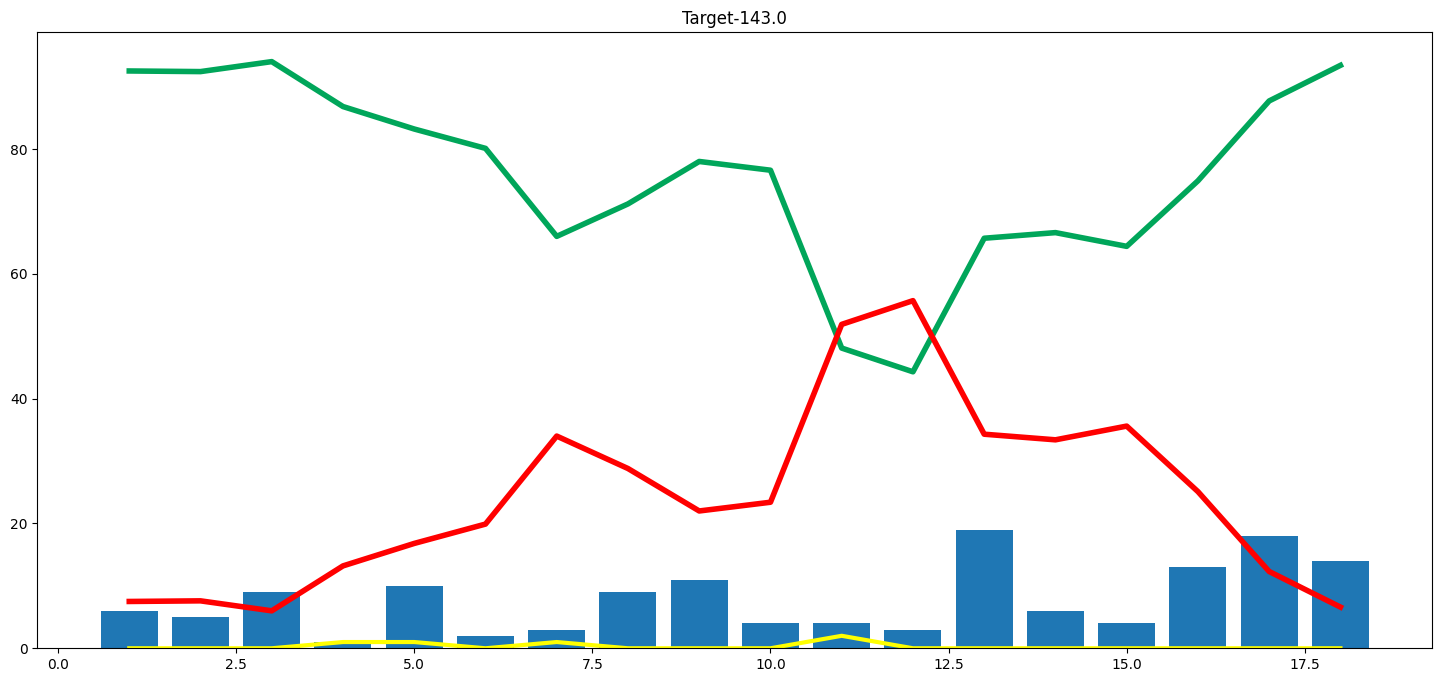

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [92]:
teams

['Royal Challengers Bengaluru',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [93]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati'], dtype=object)

In [94]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [96]:
df = pd.read_csv('delivery_df.csv')

In [97]:
df.head()

,match_id,city,winner,total_runs_x,date,inning,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
0,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,1.0,...,0,NaN,NaN,1.0,221.0,119.0,10,6.0,11.142857,0
1,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,2.0,...,0,NaN,NaN,2.0,220.0,118.0,10,6.0,11.186441,0
2,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,3.0,...,0,NaN,NaN,2.0,220.0,117.0,10,4.0,11.282051,0
3,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,4.0,...,0,NaN,NaN,3.0,219.0,116.0,10,4.5,11.327586,0
4,1,Bangalore,Kolkata Knight Riders,222.0,2008-04-18,2.0,Royal Challengers Bengaluru,Kolkata Knight Riders,0.0,5.0,...,0,NaN,NaN,4.0,218.0,115.0,10,4.8,11.373913,0


In [98]:
match_df.to_csv("match_df.csv", index=False)